# Laboratory 3 - Moving average convergence divergence (MACD)
#### dr hab. inż. Grzegorz Fotyga, prof. PG

The goal of this lab is to implement one of the most popular indicators used by the stock brokers - MACD. It can be used to analyze the trends and to determine the best buy / sell moments at the stock market. You will test that tool on the WIG20 historical data. 

## 1 Introduction - MACD indicator

Moving average convergence divergence (MACD) is one of the simplest and most effective trend-following indicators used in technical analysis of stock prices. As the name suggests, the moving average convergence divergence tool is a comparison of the relationship between the two moving average lines of a historical price data.

Specifically, the first line of the two-line indicator is the difference between the values of two moving averages (explained in section 2), and is considered the MACD line. The second line (called a SIGNAL) is a moving average of the MACD line. Intersection/crossing of the MACD and SIGNAL lines are often seen as buy and sell moments (see Fig. 1). Both lines are centered on a zero line, and will travel above and below that level depending on the strength and length of a trend.


![Figure 1](macd_example_plot.png "MACD example")


Example: let’s assume, we have the stock prices from last 30 days. The goal is to predict basing on that data the tomorrow’s stock price, using the technical analysis tools, such as MACD. Or to predict when the increasing/decreasing trend will change. In other words, to determine the best moments to make buying / selling decisions.


## 2 Arithmetic average

Average - the simplest and most commonly used average is the arithmetic one: sum of a collection of prices divided by the number of prices in the collection.

Tasks: 

1) load *data_10_days.txt*
2) plot it using plt.plot() function 
3) Compute the average value of the data using 2 methods: 
    * direct implementation of arithmetic mean (using eg. *for* loop)
    * *np.mean()*
    
    Compare both results. 

(np.float64(2471.348), np.float64(2471.348))

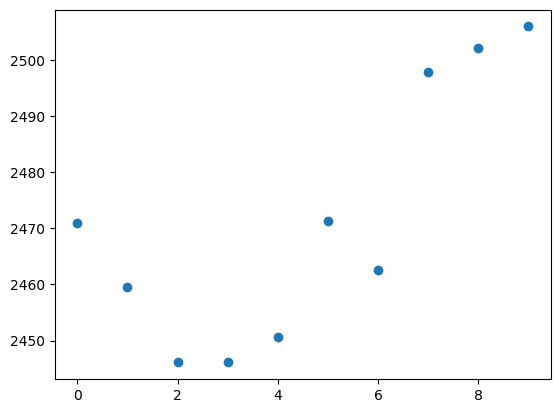

In [1]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'data_10_days.txt'
data_10_days = np.loadtxt(file_path, delimiter=',', dtype=float)
plt.plot(data_10_days,'o')

# your code
def mean(data):
    acc = 0
    for value in data:
        acc += value
    return acc / len(data)
    # or simply:
    # return sum(data) / len(data)

mean(data_10_days), np.mean(data_10_days)

## 3 Exponential (weighted) average
Exponential (weighted) average means that we want to put more weight on the prices of the most recent days and less weight on the old prices. The weights in our case decrease exponentially.
* $EMA_N = \dfrac{p_0 + (1-\alpha)p_1 + (1-\alpha)^2p_2 + ... + (1-\alpha)^{n} p_{n}}{1 + (1-\alpha) + (1-\alpha)^2 + ... + (1-\alpha)^{n}}$
* $p_i$ is the stock price form the $i$-th day, $p_0$ is today’s price and $p_n$ - the price from $n$ days ago
* $\alpha = \dfrac{2}{n+1}$
* $n+1$ -  number of prices (days) taken into account

Tasks: 

4) Compute the exponential average value of the data for *n=9*. 
5) Define *exp_avr()* function, which computes exponential average for specified data and *n*

In [2]:
# your code
n = 9
eav9_num = 0
eav9_den = 0
weight = 1 - 2 / (n + 1)
for i in range(n + 1):
    eav9_num += weight ** i * data_10_days[n - i]
    eav9_den += weight ** i

eav9 = eav9_num / eav9_den
eav9

np.float64(2482.7931343990376)

In [3]:
# your code
def exp_avr(data, n):
    eav_num = 0
    eav_den = 0
    weight = 1 - 2 / (n + 1)
    for i in range(n + 1):
        eav_num += weight ** i * data[n - i]
        eav_den += weight ** i
    return eav_num / eav_den

exp_avr(data_10_days, 9)

np.float64(2482.7931343990376)

## 4 Moving average
Let’s assume, we have a full data set, for example opening stock prices from the whole last year (one price a day). Commonly, we are interested in creating series of averages of different subsets of that full data set, for example the averages of the stock prices from the last 10 days, computed everyday. moving means that it is applied to subsequent data points.

Task:

6) Load *data_1000_days.txt* file and compute exponential moving average using *exp_avr()* function for *n=10* starting with 11-th day ($EMA_{10}$)

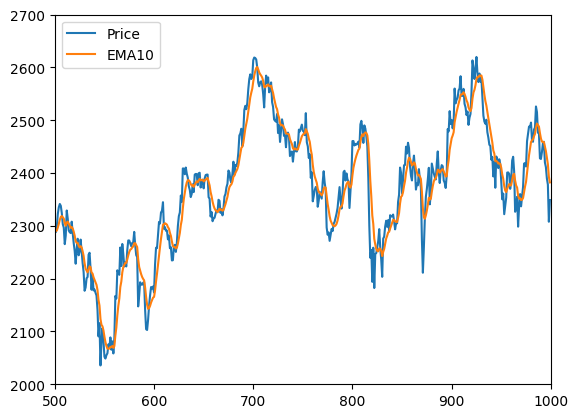

In [4]:
file_path = 'data_1000_days.txt'
data_1000_days = np.loadtxt(file_path, delimiter=',', dtype=float)

exp_aver = np.zeros_like(data_1000_days)
# your code
def ema(data, n):
    ema_n = np.zeros_like(data)
    for i in range(n, len(data)):
        ema_n[i] = exp_avr(data[i - n:i + 1], n)
    return ema_n

ema10 = ema(data_1000_days, 10)
plt.plot(data_1000_days, label = 'Price')
plt.plot(ema10, label = 'EMA10')
plt.legend()
plt.xlim(500, 1000)
plt.ylim(2000, 2700)
plt.show()

## 5. MACD indicator 

MACD and SIGNAL are defined as follows:
1. MACD = EMA12 − EMA26, where EMA12 and EMA26 are computed based on the stock prices data.
2. SIGNAL = EMA9 is computed based on MACD plot.

Tasks:

7) Generate MACD and SIGNAL for *data_1000_days.txt*
8) Plot MACD and SIGNAL. Observe the correlation between data_1000_days plot and cross sections of MACD and SIGNAL. Use plt.xlim() and plt.ylim().   
9) Write short comments - can you predict the future prices using MACD indicator? 
10) Save the notebook and upload on enauczanie course site. 

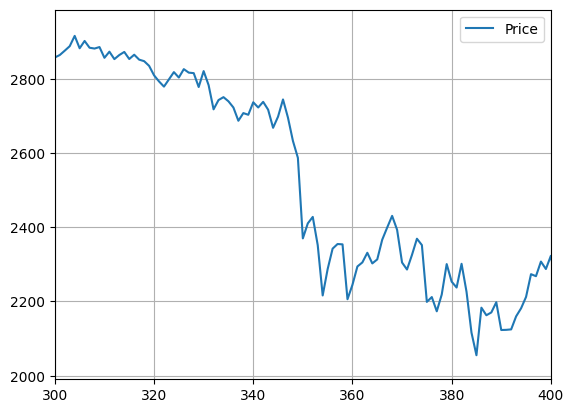

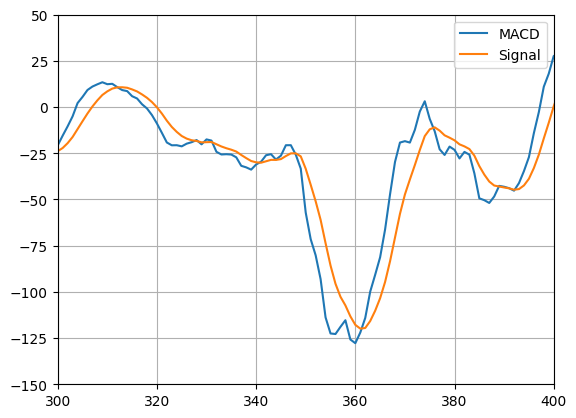

In [5]:
exp_aver12 = np.zeros_like(data_1000_days)
exp_aver26 = np.zeros_like(data_1000_days)
signal = np.zeros_like(data_1000_days)

# your code
ema12 = ema(data_1000_days, 12)
ema26 = ema(data_1000_days, 26)

MACD = ema12 - ema26
signal = ema(MACD, 9)

plt.figure()
plt.plot(data_1000_days, label = 'Price')
plt.legend()
plt.xlim(300, 400)
plt.grid()
plt.show()

plt.figure()
plt.plot(MACD, label = 'MACD')
plt.plot(signal, label = 'Signal')
plt.legend()
plt.xlim(300, 400)
plt.ylim(-150, 50)
plt.grid()
plt.show()

MACD relies on past data, meaning it is a lagging indicator. It does not predict future prices but rather indicates the strength of a trend based on the relationship between two EMAs. We can clearly spot false signals.

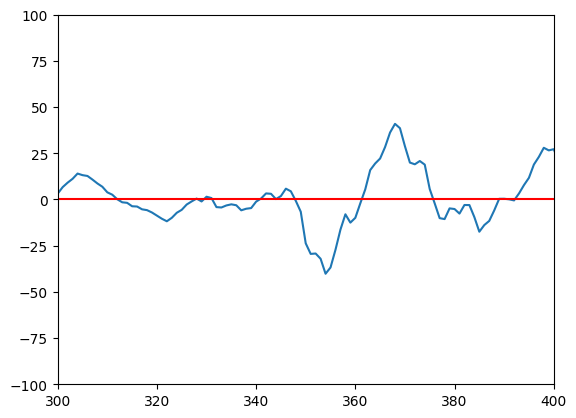

In [6]:
diff = MACD - signal
plt.plot(diff)
plt.axhline(color = 'r')
plt.xlim(300, 400)
plt.ylim(-100, 100)
plt.show()